<a href="https://colab.research.google.com/github/KavyaM22/Sentimental-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/Restaurant reviews (1).csv")

In [ ]:
#Basic Statistics
print(data.describe(include='all'))

             Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
coun

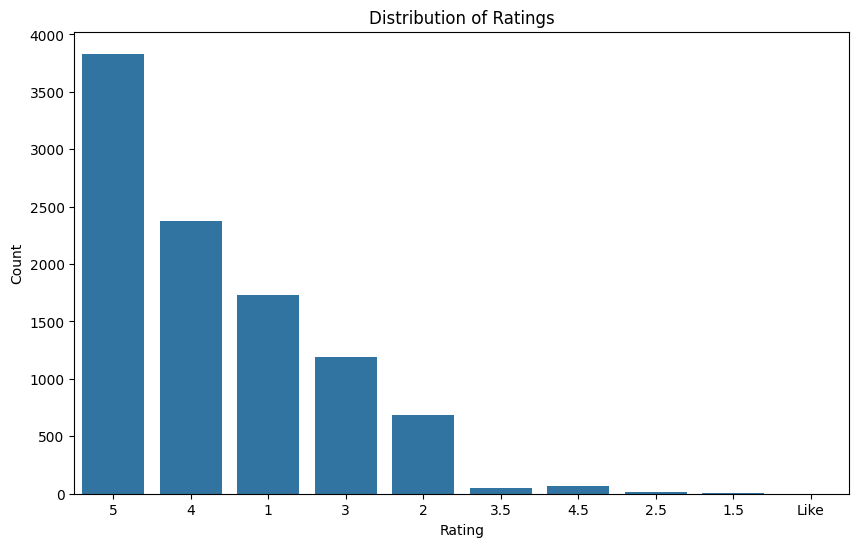

In [ ]:
#Distribution of Ratings using Count plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

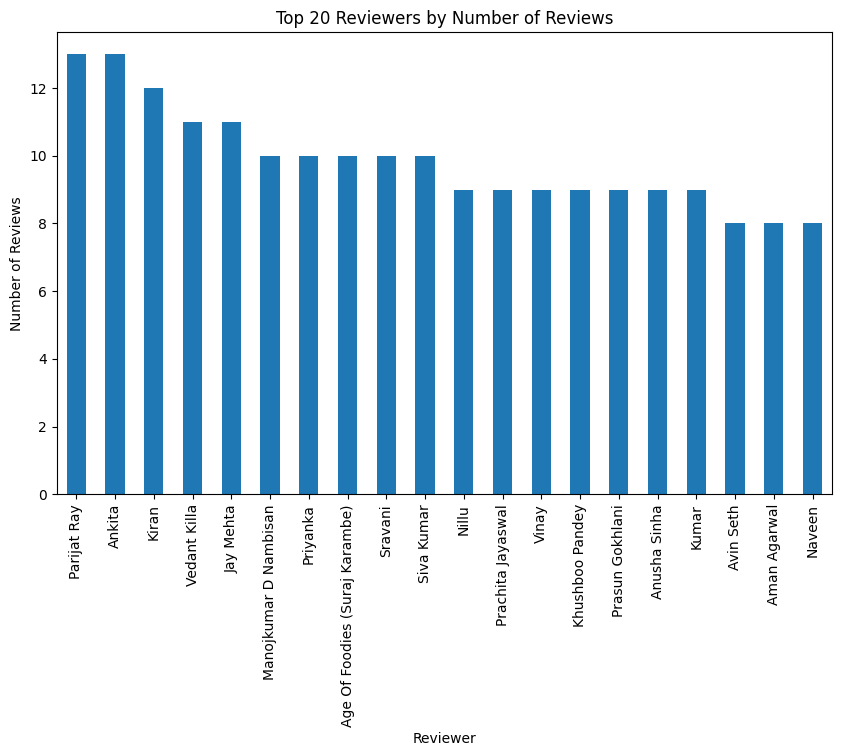

In [ ]:
#Number of Reviews per Reviewer
import matplotlib.pyplot as plt
reviews_per_reviewer = data['Reviewer'].value_counts()
plt.figure(figsize=(10, 6))
reviews_per_reviewer.head(20).plot(kind='bar')
plt.title('Top 20 Reviewers by Number of Reviews')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
print(data['Time'])

0      2019-05-25 15:54:00
1      2019-05-25 14:20:00
2      2019-05-24 22:54:00
3      2019-05-24 22:11:00
4      2019-05-24 21:37:00
               ...        
9995   2016-06-05 00:08:00
9996   2016-06-04 22:01:00
9997   2016-06-03 10:37:00
9998   2016-05-31 17:22:00
9999   2016-05-31 16:41:00
Name: Time, Length: 10000, dtype: datetime64[ns]


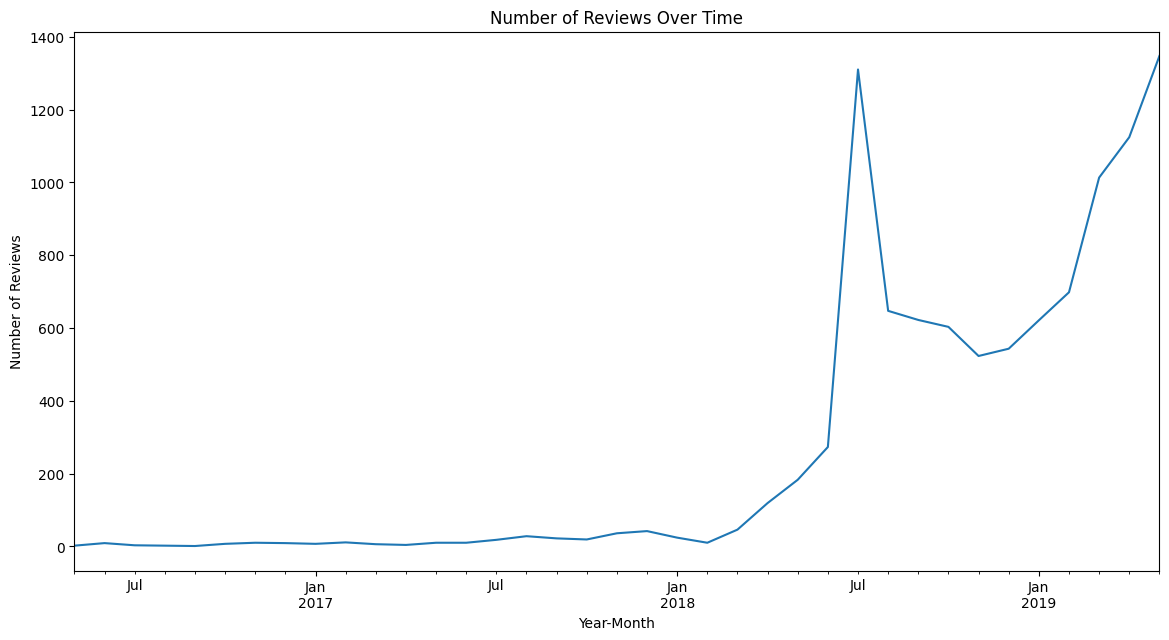

In [ ]:
#Reviews Over Time
import matplotlib.pyplot as plt
data['YearMonth'] = data['Time'].dt.to_period('M')
reviews_over_time = data['YearMonth'].value_counts().sort_index()#sorts the value in chronological order
plt.figure(figsize=(14, 7))
reviews_over_time.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.show()


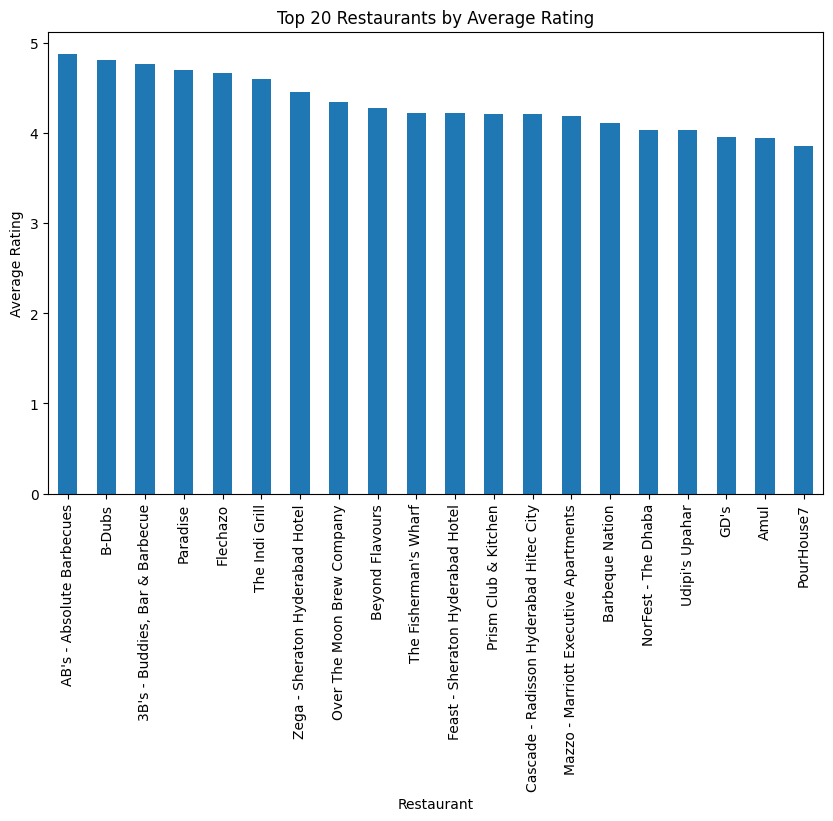

In [ ]:
#Average Rating per Restaurant
import matplotlib.pyplot as plt
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce').fillna(-1).astype(int)
avg_rating_per_restaurant = data.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_rating_per_restaurant.head(20).plot(kind='bar')
plt.title('Top 20 Restaurants by Average Rating')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.show()

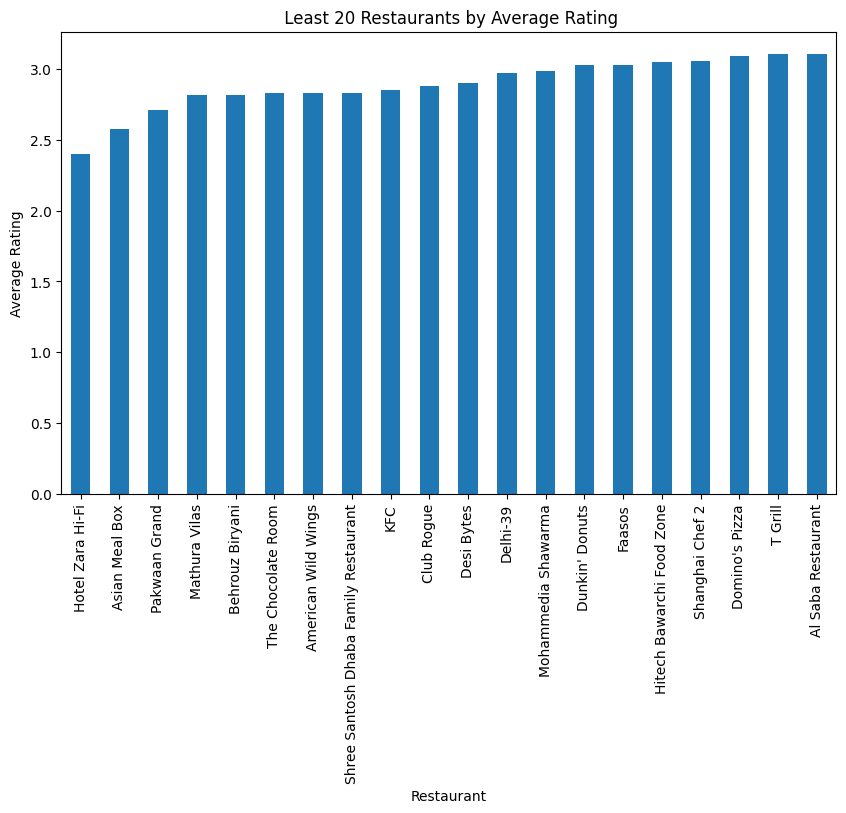

In [ ]:
#Average Rating per Restaurant
import matplotlib.pyplot as plt
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce').fillna(-1).astype(int)
avg_rating_per_restaurant = data.groupby('Restaurant')['Rating'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
avg_rating_per_restaurant.head(20).plot(kind='bar')
plt.title(' Least 20 Restaurants by Average Rating')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# Group by restaurant and calculate the average rating
top_rated_restaurants = data.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False).head(10)

print(top_rated_restaurants)

                         Restaurant  Rating
3         AB's - Absolute Barbecues    4.88
11                           B-Dubs    4.81
2    3B's - Buddies, Bar & Barbecue    4.76
67                         Paradise    4.70
35                         Flechazo    4.66
87                   The Indi Grill    4.60
97  Zega - Sheraton Hyderabad Hotel    4.45
64       Over The Moon Brew Company    4.34
16                  Beyond Flavours    4.28
84            The Fisherman's Wharf    4.22


In [ ]:
# Group by restaurant and calculate the average rating
least_rated_restaurants = data.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=True).head(10)

print(least_rated_restaurants)

                               Restaurant  Rating
41                       Hotel Zara Hi-Fi    2.40
10                         Asian Meal Box    2.58
66                          Pakwaan Grand    2.71
57                          Mathura Vilas    2.82
14                        Behrouz Biryani    2.82
83                     The Chocolate Room    2.83
6                     American Wild Wings    2.83
78  Shree Santosh Dhaba Family Restaurant    2.83
47                                    KFC    2.85
21                             Club Rogue    2.88
